In [17]:
import random
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn import preprocessing
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt

In [8]:
data=pd.read_csv('C:/Users/BHASKAR BOSE/Dropbox/My PC (LAPTOP-7GV3U44E)/Downloads/XMM_ML.csv')
data.head()

,sc_ra,sc_dec,sc_poserr,sc_det_ml,sc_ep_1_flux,sc_ep_2_flux,sc_ep_3_flux,sc_ep_4_flux,sc_ep_5_flux,sc_ep_8_flux,sc_ep_9_flux,sc_hr1,sc_hr2,sc_hr3,sc_hr4,sc_extent,sc_ep_8_fmin,sc_ep_8_fmax,Class
0,1.836559,20.122780,0.508007,408.3659,2.380000e-15,7.000000e-15,9.370000e-15,1.060000e-14,1.970000e-14,4.850000e-14,3.080000e-14,0.389105,-0.002790,-0.401496,-0.120218,0.0,2.650000e-14,9.910000e-14,0
1,87.383962,-21.924875,0.336117,2672.8470,7.140000e-15,1.990000e-14,2.800000e-14,3.040000e-14,5.990000e-14,1.460000e-13,8.370000e-14,0.444257,0.119971,-0.443130,-0.331475,0.0,1.430000e-13,1.490000e-13,0
2,159.945875,-5.116026,0.521204,583.1679,2.380000e-15,7.920000e-15,8.050000e-15,9.410000e-15,4.540000e-15,3.030000e-14,2.890000e-14,0.515240,0.000777,-0.370514,-0.495102,0.0,2.010000e-14,6.730000e-14,0
3,38.766442,32.677084,0.689360,292.4774,7.120000e-16,6.610000e-15,2.400000e-14,6.570000e-14,8.240000e-14,1.860000e-13,7.540000e-14,0.849070,0.559812,-0.026348,-0.400924,0.0,1.580000e-13,2.640000e-13,0
4,141.661199,36.400714,0.309602,2871.4660,2.670000e-15,9.070000e-15,1.980000e-14,4.530000e-14,5.810000e-14,1.360000e-13,6.460000e-14,0.497494,0.319506,-0.113438,-0.504149,0.0,1.360000e-13,1.360000e-13,0


In [9]:
print("Shape of the data is {}".format(data.shape))

Shape of the data is (23017, 19)


In [12]:
data.isnull().sum()

sc_ra             0
sc_dec            0
sc_poserr         0
sc_det_ml         0
sc_ep_1_flux      0
sc_ep_2_flux      0
sc_ep_3_flux      0
sc_ep_4_flux      0
sc_ep_5_flux      0
sc_ep_8_flux      0
sc_ep_9_flux      0
sc_hr1           34
sc_hr2           13
sc_hr3           44
sc_hr4          246
sc_extent         0
sc_ep_8_fmin      0
sc_ep_8_fmax      0
Class             0
dtype: int64

In [13]:
data=data.dropna()

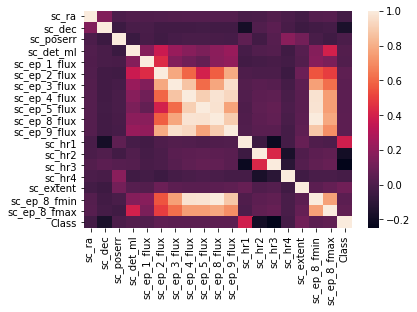

In [38]:
sns.heatmap(data.corr())

In [16]:
scaler=preprocessing.StandardScaler()

data.index=np.array(range(22715))
main_data=data[data.columns[0:-1]]
labels=data[data.columns[-1]]
columns=main_data.columns

main_data=scaler.fit_transform(main_data)
main_data

main_data=pd.DataFrame(main_data,columns=columns)
main_data.head()

,sc_ra,sc_dec,sc_poserr,sc_det_ml,sc_ep_1_flux,sc_ep_2_flux,sc_ep_3_flux,sc_ep_4_flux,sc_ep_5_flux,sc_ep_8_flux,sc_ep_9_flux,sc_hr1,sc_hr2,sc_hr3,sc_hr4,sc_extent,sc_ep_8_fmin,sc_ep_8_fmax
0,-1.623851,0.451717,-0.586389,-0.065919,-0.035704,-0.081287,-0.053214,-0.042491,-0.039007,-0.048602,-0.058635,0.033827,0.061084,0.127151,0.302817,-0.16029,-0.045165,-0.061084
1,-0.730777,-0.685126,-0.837420,-0.065047,-0.034653,-0.077546,-0.050662,-0.041457,-0.038055,-0.047158,-0.056369,0.186057,0.370809,0.008002,-0.104440,-0.16029,-0.043378,-0.060547
2,0.026734,-0.230665,-0.567116,-0.065852,-0.035704,-0.081021,-0.053394,-0.042553,-0.039366,-0.048872,-0.058716,0.381981,0.070083,0.215816,-0.419877,-0.16029,-0.045263,-0.061426
3,-1.238321,0.791147,-0.321538,-0.065964,-0.036073,-0.081400,-0.051210,-0.039614,-0.037523,-0.046565,-0.056725,1.303412,1.480530,1.200751,-0.238322,-0.16029,-0.043148,-0.059310
4,-0.164149,0.891823,-0.876142,-0.064970,-0.035640,-0.080687,-0.051785,-0.040679,-0.038098,-0.047306,-0.057187,0.332999,0.874238,0.951518,-0.437319,-0.16029,-0.043485,-0.060687


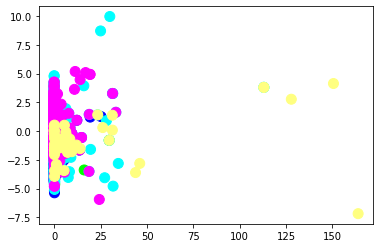

In [41]:
pca=PCA(n_components=2)
csv_data=pca.fit_transform(main_data)

c1=(1.0,0.0,0.0,1.0)
c2=(0.0,1.0,0.0,1.0)
c3=(0.0,0.0,1.0,1.0)
c4=(1.0,1.0,0.0,1.0)
c5=(0.0,1.0,1.0,1.0)
c6=(1.0,0.0,1.0,1.0)
c7=(1.0,1.0,0.5,1.0)
colormap=np.array([c1,c2,c3,c4,c5,c6,c7])

label_data=np.array(labels)

plt.scatter(csv_data[:,0], csv_data[:,1],s=100, c=colormap[label_data])
plt.show()

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(main_data, labels, stratify=labels, test_size=0.2)

In [35]:
# This is baseline with no oversampling/undersampling
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 
xgb_clf = xgb.XGBClassifier()

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, Y_train)
xgb_clf.fit(X_train, Y_train)

# performing predictions on the test dataset
y_pred_rf1 = clf.predict(X_test)
y_pred_xgb1 = xgb_clf.predict(X_test)

# using metrics module for accuracy calculation
print("ACCURACY OF THE Random_Forest_Classifier: ", metrics.accuracy_score(Y_test, y_pred_rf1))
print("ACCURACY OF THE XGB_Classifier: ", metrics.accuracy_score(Y_test, y_pred_xgb1))

ACCURACY OF THE Random_Forest_Classifier:  0.7534668721109399
ACCURACY OF THE XGB_Classifier:  0.7895663658375522


In [37]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.25      0.06      0.09        35
           2       0.79      0.90      0.84      2062
           3       0.07      0.02      0.03        52
           4       0.80      0.87      0.83      1606
           5       0.39      0.21      0.28       771
           6       0.38      0.30      0.33        10

    accuracy                           0.75      4543
   macro avg       0.38      0.34      0.34      4543
weighted avg       0.71      0.75      0.73      4543



C:\Users\BHASKAR BOSE\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BHASKAR BOSE\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BHASKAR BOSE\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


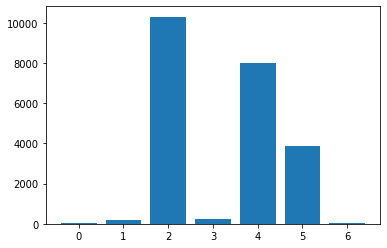

In [29]:
labels_df=pd.DataFrame(labels)
labels_df.groupby('Class').size()
plt.bar(labels_df.groupby('Class').size().index,labels_df.groupby('Class').size())
plt.show()

In [30]:
smt=SMOTE(sampling_strategy={0:2000, 1:2000, 3:2000, 6:2000})

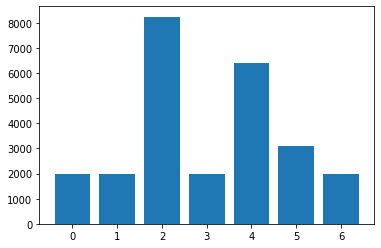

In [31]:
X,Y=smt.fit_resample(X_train,Y_train)

labels_df=pd.DataFrame(Y)
labels_df.groupby('Class').size()
plt.bar(labels_df.groupby('Class').size().index,labels_df.groupby('Class').size())
plt.show()

In [49]:
# This is baseline with no oversampling/undersampling
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 
xgb_clf = xgb.XGBClassifier()

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X, Y)
xgb_clf.fit(X, Y)

# performing predictions on the test dataset
y_pred_rf2 = clf.predict(X_test)
y_pred_xgb2 = xgb_clf.predict(X_test)

# using metrics module for accuracy calculation
print("ACCURACY OF THE Random_Forest_Classifier: ", metrics.accuracy_score(Y_test, y_pred_rf2))
print("ACCURACY OF THE XGB_Classifier: ", metrics.accuracy_score(Y_test, y_pred_xgb2))

ACCURACY OF THE Random_Forest_Classifier:  0.7722
ACCURACY OF THE XGB_Classifier:  0.8136


In [51]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.04      0.14      0.06         7
           1       0.24      0.40      0.30        35
           2       0.79      0.89      0.84      2062
           3       0.13      0.12      0.12        52
           4       0.80      0.85      0.83      1606
           5       0.36      0.18      0.24       771
           6       0.20      0.40      0.27        10

    accuracy                           0.77      4543
   macro avg       0.39      0.43      0.40      4543
weighted avg       0.72      0.77      0.74      4543



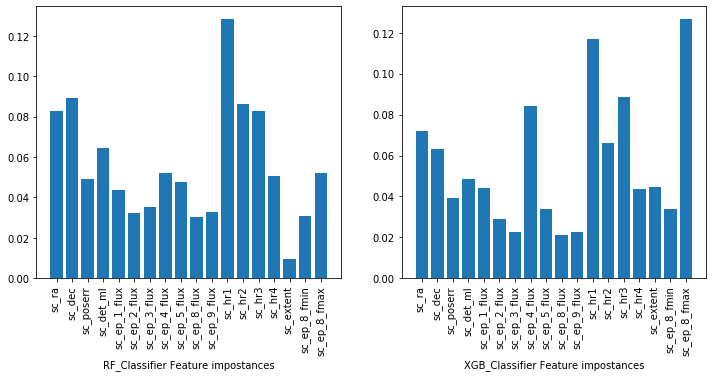

In [81]:
figs, axes = plt.subplots(1,2)
axes[0].bar(X.columns,clf.feature_importances_)
axes[1].bar(X.columns,xgb_clf.feature_importances_)

figs.set_figwidth(12)
figs.set_figheight(5)

plt.setp(axes[0].get_xticklabels(), rotation=90)
plt.setp(axes[1].get_xticklabels(), rotation=90)

axes[0].set_xlabel('RF_Classifier Feature impostances')
axes[1].set_xlabel('XGB_Classifier Feature impostances')
plt.show()

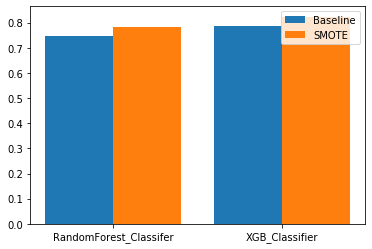

In [57]:
blue=[metrics.accuracy_score(Y_test, y_pred_rf1), metrics.accuracy_score(Y_test, y_pred_xgb1)]
orange=[metrics.accuracy_score(Y_test, y_pred_rf2), metrics.accuracy_score(Y_test, y_pred_xgb2)]
plt.bar(['RandomForest_Classifer','XGB_Classifier'],blue,align='edge',width=-0.4,label='Baseline')
plt.bar(['RandomForest_Classifer','XGB_Classifier'],orange,align='edge' ,width=0.4,label='SMOTE')
plt.legend()
plt.show()